In [1992]:
import numpy as np
import matplotlib.pyplot as plt

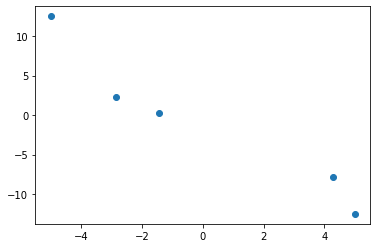

In [1993]:
X = np.linspace(-5,5,15)

X_train = np.sort(np.random.choice(X, 5,replace=False))
X_test = X[~np.isin(X,X_train)]

Y_train = -np.power(X_train,3)/10
Y_test = -np.power(X_test,3)/10


plt.scatter(X_train, Y_train)
plt.show()

In [1994]:
def kernel(a, b, length=1):
    """ GP squared exponential kernel """
    sq_dist = np.subtract.outer(a,b)**2
    return np.exp(-0.5 * (1 / length**2) * sq_dist)

In [1995]:
k = kernel(X_train,X_train)

In [1996]:
L = np.linalg.cholesky(k)

In [1997]:
n = np.size(X_train)
m = 4

u = np.random.normal(size=(n, m))

In [1998]:
f_prior = np.dot(L,u)


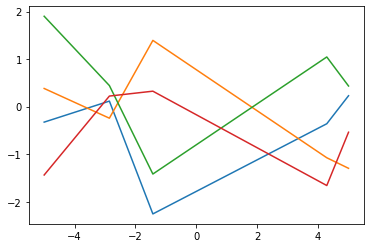

In [1999]:
plt.plot(X_train, f_prior)

plt.show()

In [2000]:
post_mean = np.dot(np.matmul(kernel(X_test,X_train), np.linalg.inv(kernel(X_train,X_train))),Y_train.reshape(-1,1))
post_var = kernel(X_test,X_test)-np.matmul(np.matmul(kernel(X_test,X_train),np.linalg.inv(kernel(X_train,X_train))),kernel(X_train,X_test))

In [2001]:
L = np.linalg.cholesky(post_var)

In [2002]:
n = np.size(X_test)
m = 3

u = np.random.normal(size=(n, m))

In [2003]:
f_post = post_mean + np.dot(L,u)

var = post_var.diagonal()

In [2004]:
np.sqrt(var)

array([0.55702398, 0.53503276, 0.34007821, 0.60214616, 0.9247893 ,
       0.99421813, 0.99953215, 0.99020904, 0.88895477, 0.50555149])

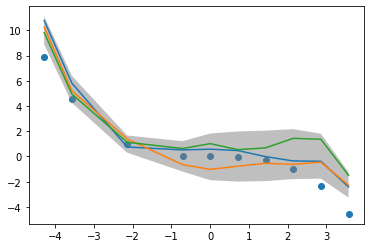

In [2005]:
plt.plot(X_test, f_post)
plt.scatter(X_test, Y_test)
plt.fill_between(X_test, post_mean.reshape(1,-1)[0]-2*np.sqrt(var) , 2*np.sqrt(var)+post_mean.reshape(1,-1)[0],facecolor='gray',alpha=0.5)


plt.show()